# Interactive Plots and Diagrams

In [1]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/b00ccf00029aa02d48068b44b789a7843cfaa569-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/b00ccf00029aa02d48068b44b789a7843cfaa569-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Interactive plotting can be useful and fun. Here we have a few examples to get you started creating your own interactive plots. We will extensively use the `@manipulate` macro.

## Drawing with svg

The `dom".."` macro allows us to create any element in the DOM, such as for example svg. Here is an example you can play around with.

In [2]:
width, height = 700, 300
colors = ["black", "gray", "silver", "maroon", "red", "olive", "yellow", "green", "lime", "teal", "aqua", "navy", "blue", "purple", "fuchsia"]
color(i) = colors[i%length(colors)+1]
ui = @manipulate for nsamples in 1:200,
        sample_step in slider(0.01:0.01:1.0, value=0.1, label="sample step"),
        phase in slider(0:0.1:2pi, value=0.0, label="phase"),
        radii in 0.1:0.1:60
    cxs_unscaled = [i*sample_step + phase for i in 1:nsamples]
    cys = sin.(cxs_unscaled) .* height/3 .+ height/2
    cxs = cxs_unscaled .* width/4pi
    dom"svg:svg[width=$width, height=$height]"(
        (dom"svg:circle[cx=$(cxs[i]), cy=$(cys[i]), r=$radii, fill=$(color(i))]"()
            for i in 1:nsamples)...
    )
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:nsamples=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
100), Observable{Int64} with 2 listeners. Value:
100, Scope("knockout-component-751acae8-6da7-4cb3-953b-d03ecb9dea7b", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["nsamples"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>200,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
100, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/home/olszewskip/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":100}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-751acae8-6da7-4cb3-953b-d03ecb9dea7b\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-751acae8-6da7-4cb3-953b-d03ecb9dea7b\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\

## Plots

In [5]:
using Plots, Colors

In [6]:
@manipulate for ϕ = 0:π/16:4π, f = [sin, cos], both = false
    if both
        plot([θ -> sin(θ + ϕ), θ -> cos(θ + ϕ)], 0, 8)
    else
        plot(θ -> f(θ + ϕ), 0, 8)
    end
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:ϕ=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
33,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.19635", "0.392699", "0.589049", "0.785398", "0.981748", "1.1781", "1.37445", "1.5708", "1.76715"  …  "10.7992", "10.9956", "11.1919", "11.3883", "11.5846", "11.781", "11.9773", "12.1737", "12.37", "12.5664"],:formatted_value=>Observable{String} with 1 listeners. Value:
"6.28319",:value=>Observable{Float64} with 2 listeners. Value:
6.28319), Observable{Float64} with 2 listeners. Value:
6.28319, Scope("knockout-component-8178cda3-913c-4577-983f-2e9b5e4de58f", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ϕ"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>65,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.19635", "0.392699", "0.589049", "0.785398", "0.981748", "1.1781", "1.37445", "1.5708", "1.76715"  …  "10.7992", "10.9956", "11.1919", "11.3883", "11.5846", "11.781", "11.9773", "12.1737", "12.37", "12.5664"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"6.28319", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
33, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/home/olszewskip/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('v

In [7]:
@manipulate for n=1:25, g=[:scatter, :path], col=colorant"red"
    plot(rand(n), rand(n), linetype=g, color=col)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:n=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
13), Observable{Int64} with 2 listeners. Value:
13, Scope("knockout-component-93923bcc-d9c4-492d-8f18-05e233a9cdc7", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>25,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
13, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/home/olszewskip/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":13}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-93923bcc-d9c4-492d-8f18-05e233a9cdc7\",\"id\":\"ob_52\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-93923bcc-d9c4-492d-8f18-05e233a9cdc7\",\"id\":\"ob_51\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n 

## PyPlot

In [9]:
using PyPlot

┌ Info: Recompiling stale cache file /home/olszewskip/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


Since PyPlot images are often displayed as the result of function side-effects, you'll need to take an extra step in order for interactive PyPlot graphics to be updated properly as widget values are updated. You do this by using the `withfig` function to specify a figure object that will be updated in each iteration of `@manipulate`. Notice `f = figure()` and `withfig(f)` in the example below. The rest of it is straightforward.

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:α=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
11,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["1.0", "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "1.8", "1.9"  …  "2.1", "2.2", "2.3", "2.4", "2.5", "2.6", "2.7", "2.8", "2.9", "3.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"2.0",:value=>Observable{Float64} with 2 listeners. Value:
2.0), Observable{Float64} with 2 listeners. Value:
2.0, Scope("knockout-component-8f38ebe2-35d2-4e47-a1e0-854c1c993d0b", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["1.0", "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "1.8", "1.9"  …  "2.1", "2.2", "2.3", "2.4", "2.5", "2.6", "2.7", "2.8", "2.9", "3.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"2.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
11, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/olszewskip/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/home/olszewskip/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/home/olszewskip/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"1.0\\\",\\\"1.1\\\",\\\"1.2\\\",\\\"1.3\\\",\\\"1.4\\\",\\\
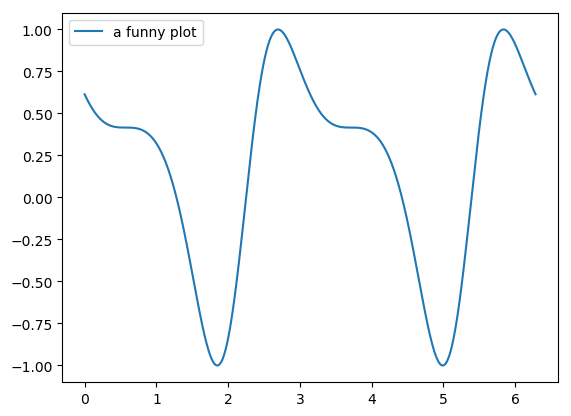
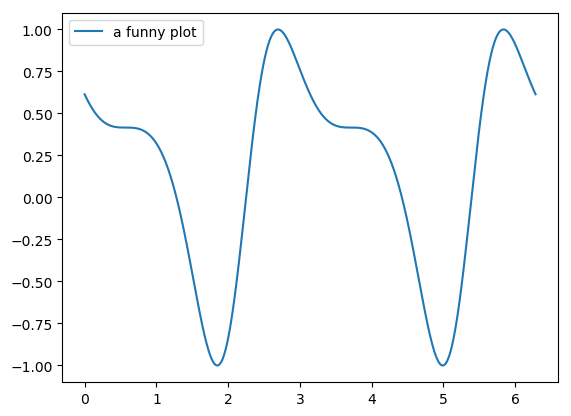

In [10]:
f = figure()
x = range(0, stop=2π, length=1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg="a funny plot"; withfig(f) do
        PyPlot.plot(x, cos.(α.*x .+ sin.(β.*x .+ γ)))
        legend([leg])
    end
end

As an added bonus, you can even fire up a Python GUI with `pygui(true)` and be able to use the widgets above to update the plot.

# PyPlot Subplots

Manipulating a PyPlot figure with multiple subplots adds an extra layer of complication. The `withfig` function clears the current figure window by default at each `@manipulate` iteration. If you're manipulating multiple subplots in one figure they will not be displayed correctly. To prevent subplots being destroyed use `withfig(f,clear=false)`. Setting `clear=false` leaves the responsibility for clearing the figure window up to the user. In the case of multiple subplots you can clear each axes object individually, rather than the figure itself. This is shown in the example below.

In [ ]:
f2,axes = subplots(2,1)
x = range(0, stop=2π, length=1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg1="a funny plot", leg2=" an even funnier plot" 
    withfig(f2,clear=false) do
        for ax in axes
            ax[:cla]()
        end
        axes[1][:plot](x, sin.(α*x .+ cos.(β*x .+ γ)))
        axes[2][:plot](x, cos.(α*x .+ sin.(β*x .+ γ)))
        axes[1][:legend]([leg1])
        axes[2][:legend]([leg2])
    end
end